# TAREA SEMANA 3 L1 Y L2 en Logistic Regression y momentum


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

# Data Set

In [15]:

dataset_train = 'train/train/'
dataset_test =  'test/test/'
num_px = 64

In [16]:
def show_ten_images(images):
#     print("images[0]-> bgr color: %s"%(str(images[0][0, 0])))
    print("shape[0]-> shape : %s"%(str(images[0].shape)))
    fig = plt.figure(figsize=(36,16))
    for i in range(1, 11):
        fig.add_subplot(2,5,i)
        plt.imshow(images[i-1])
    plt.show()

shape[0]-> shape : (374, 500, 3)


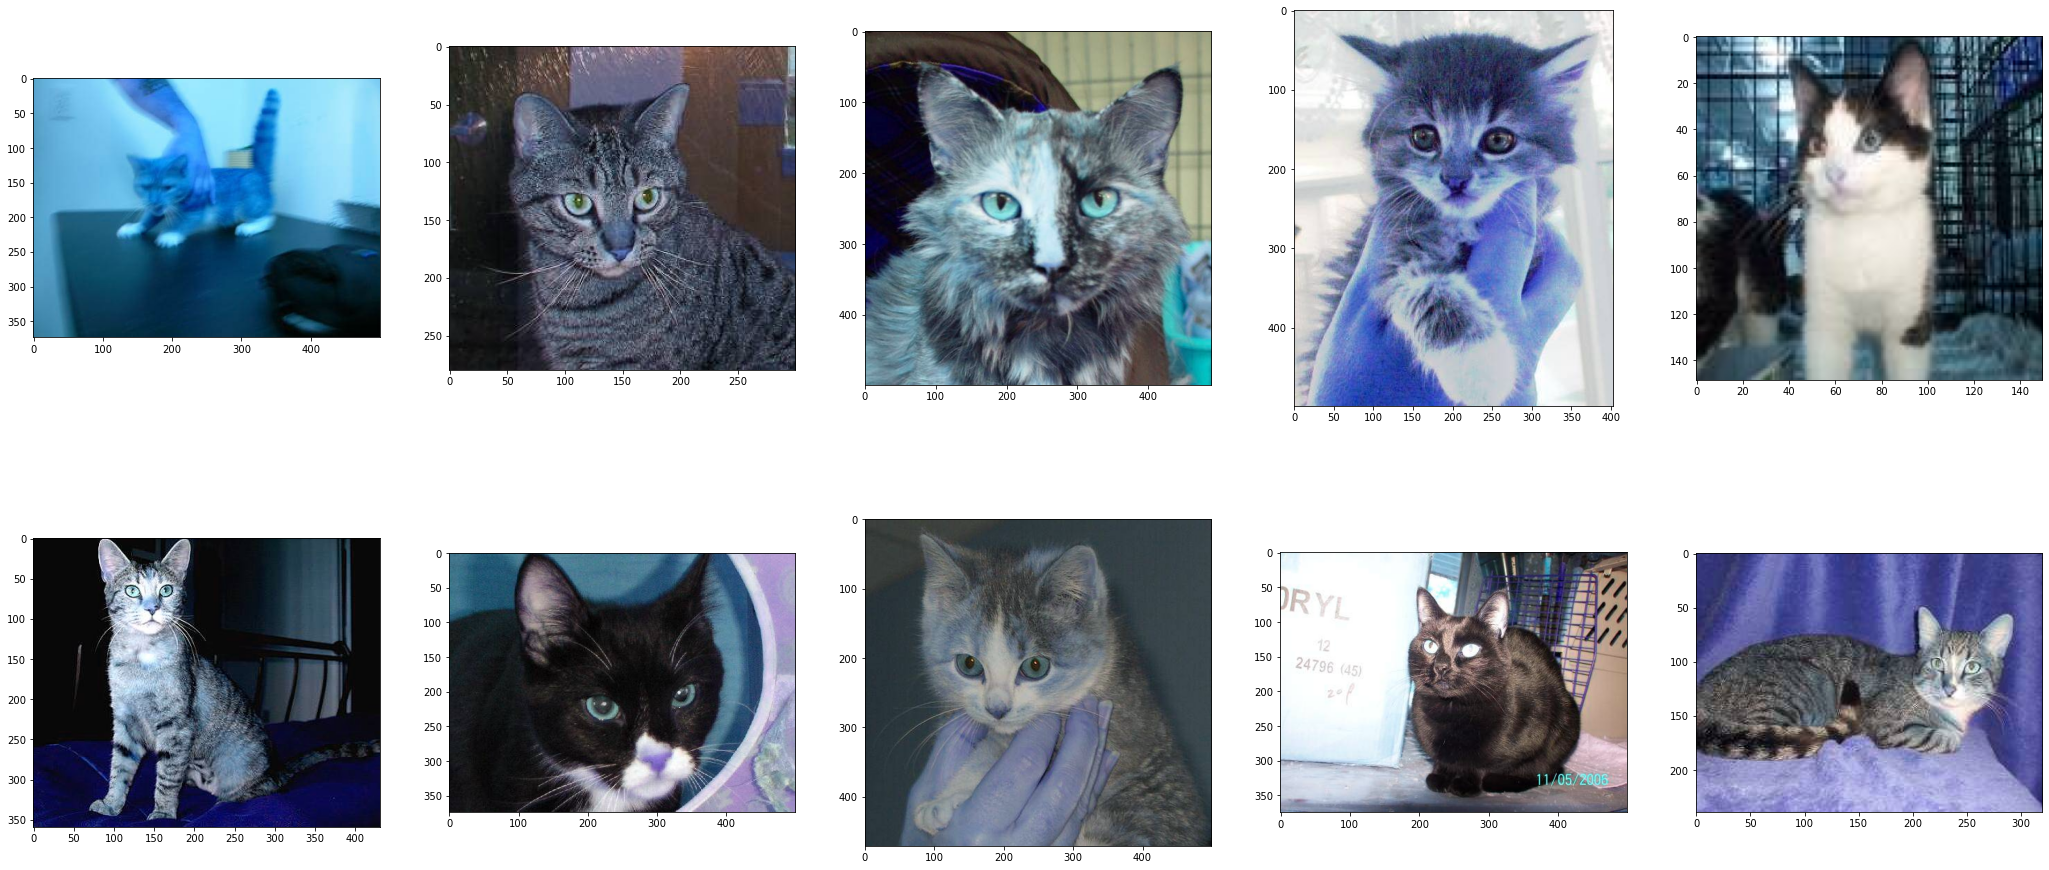

In [17]:
def load_10_images(path): 
    num_images = 10
    it = 0
    images = []
    for p in os.listdir(path):
        category = p.split('.')[0]
        img_array = cv2.imread(os.path.join(path, p), cv2.IMREAD_UNCHANGED)
        images.append(img_array)
        it = it + 1
        if it == num_images:
            break
            
    return images

images = load_10_images(dataset_train)
show_ten_images(images)

In [18]:
def generate_dataframe_cat_dogs_from_folder(folder):
    data = {'id': [], 'label_name': [], 'label_tag': [], 'file': []}
    for p in os.listdir(folder):
        split = p.split('.')
        _id, category = split[1], split[0]
        data['id'].append(str(_id))
        data['label_name'].append(category)
        data['label_tag'].append(0 if category == 'cat' else 1)
        data['file'].append(p)
        
    data_frame = pd.DataFrame(data, columns=['id', 'label_name', 'label_tag', 'file'])
    
    return data_frame

In [19]:
data_frame = generate_dataframe_cat_dogs_from_folder(dataset_train)
data_frame.head()

,id,label_name,label_tag,file
0,0,cat,0,cat.0.jpg
1,1,cat,0,cat.1.jpg
2,10,cat,0,cat.10.jpg
3,100,cat,0,cat.100.jpg
4,1000,cat,0,cat.1000.jpg


In [20]:
num_cats = (data_frame.label_name.values == 'cat').sum()
num_dogs = (data_frame.label_name.values == 'dog').sum()
print("numero de gatos %d"%(num_cats))
print("numero de perros %d"%(num_dogs))

numero de gatos 12500
numero de perros 12500


In [21]:
df_cat = data_frame.loc[data_frame['label_name'] == 'cat']
df_dog = data_frame.loc[data_frame['label_name'] == 'dog']

In [22]:
df_cat.head()

,id,label_name,label_tag,file
0,0,cat,0,cat.0.jpg
1,1,cat,0,cat.1.jpg
2,10,cat,0,cat.10.jpg
3,100,cat,0,cat.100.jpg
4,1000,cat,0,cat.1000.jpg


In [23]:
df_dog.head()

,id,label_name,label_tag,file
12500,0,dog,1,dog.0.jpg
12501,1,dog,1,dog.1.jpg
12502,10,dog,1,dog.10.jpg
12503,100,dog,1,dog.100.jpg
12504,1000,dog,1,dog.1000.jpg


## Hiperparametros y tamaño del dataset

In [24]:
num_trains = 300
num_test = 20
num_px = 64

In [25]:
porc_train_cat = 0.5
porc_train_dog = 0.5
porc_test_cat = 0.5
porc_test_dog = 0.5

In [26]:
tot_train_cat = int(num_trains * porc_train_cat)
tot_train_dog = int(num_trains * porc_train_dog)
tot_test_cat = int(num_test * porc_test_cat)
tot_test_dog = int(num_test * porc_test_dog)
print("Total de gatos en el train set %d"%(tot_train_cat))
print("Total de perros en el train set %d"%(tot_train_dog))
print("Total de gatos en el test set %d"%(tot_test_cat))
print("Total de perros en el test set %d"%(tot_test_dog))

Total de gatos en el train set 150
Total de perros en el train set 150
Total de gatos en el test set 10
Total de perros en el test set 10


In [27]:
def get_train_test_set(num_train_cats, num_train_dogs, num_test_cats, num_test_dogs, df_cat, df_dog):
    df_train_cats = df_cat.head(num_train_cats)
    df_train_dogs = df_dog.head(num_train_dogs)
    df_test_cats = df_cat.tail(num_test_cats)
    df_test_dogs = df_dog.tail(num_test_dogs)
    
    df_train = pd.concat([df_train_cats, df_train_dogs])
    df_test = pd.concat([df_test_cats, df_test_dogs])
    
    return df_train, df_test

In [28]:
df_train, df_test = get_train_test_set(tot_train_cat,
                                      tot_train_dog,
                                      tot_test_cat,
                                      tot_test_dog,
                                      df_cat,
                                      df_dog)

In [29]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
print(df_train.shape)
print(df_train.head())

(300, 4)
      id label_name  label_tag           file
0  10105        dog          1  dog.10105.jpg
1  10066        cat          0  cat.10066.jpg
2  10056        dog          1  dog.10056.jpg
3  10032        dog          1  dog.10032.jpg
4  10045        dog          1  dog.10045.jpg


In [30]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
print(df_test.shape)
print(df_test.head())

(20, 4)
     id label_name  label_tag          file
0  9992        dog          1  dog.9992.jpg
1  9995        dog          1  dog.9995.jpg
2  9994        dog          1  dog.9994.jpg
3  9997        cat          0  cat.9997.jpg
4  9991        cat          0  cat.9991.jpg


In [31]:
def load_dataset_from_dataframe_and_path(dataframe, num_px, path):
    X = []
    Y = []
    for index, row in dataframe.iterrows():
        img_array = cv2.imread(os.path.join(path, row['file']), cv2.IMREAD_UNCHANGED)        
        img_array = cv2.resize(img_array, dsize=(num_px, num_px))
        X.append(img_array.copy())
        Y.append(row['label_tag'])
        
    X = np.array(X)
    Y = np.array([Y])
    
    return X, Y

In [32]:
X_train, Y_train = load_dataset_from_dataframe_and_path(df_train, num_px, dataset_train)
X_test, Y_test = load_dataset_from_dataframe_and_path(df_test, num_px, dataset_train)

In [33]:
print("X train dataset %s"%(str(X_train.shape)))
print("Y train dataset %s"%(str(Y_train.shape)))
print("X test dataset %s"%(str(X_test.shape)))
print("Y test dataset %s"%(str(Y_test.shape)))

X train dataset (300, 64, 64, 3)
Y train dataset (1, 300)
X test dataset (20, 64, 64, 3)
Y test dataset (1, 20)


TRAIN SET
shape[0]-> shape : (64, 64, 3)


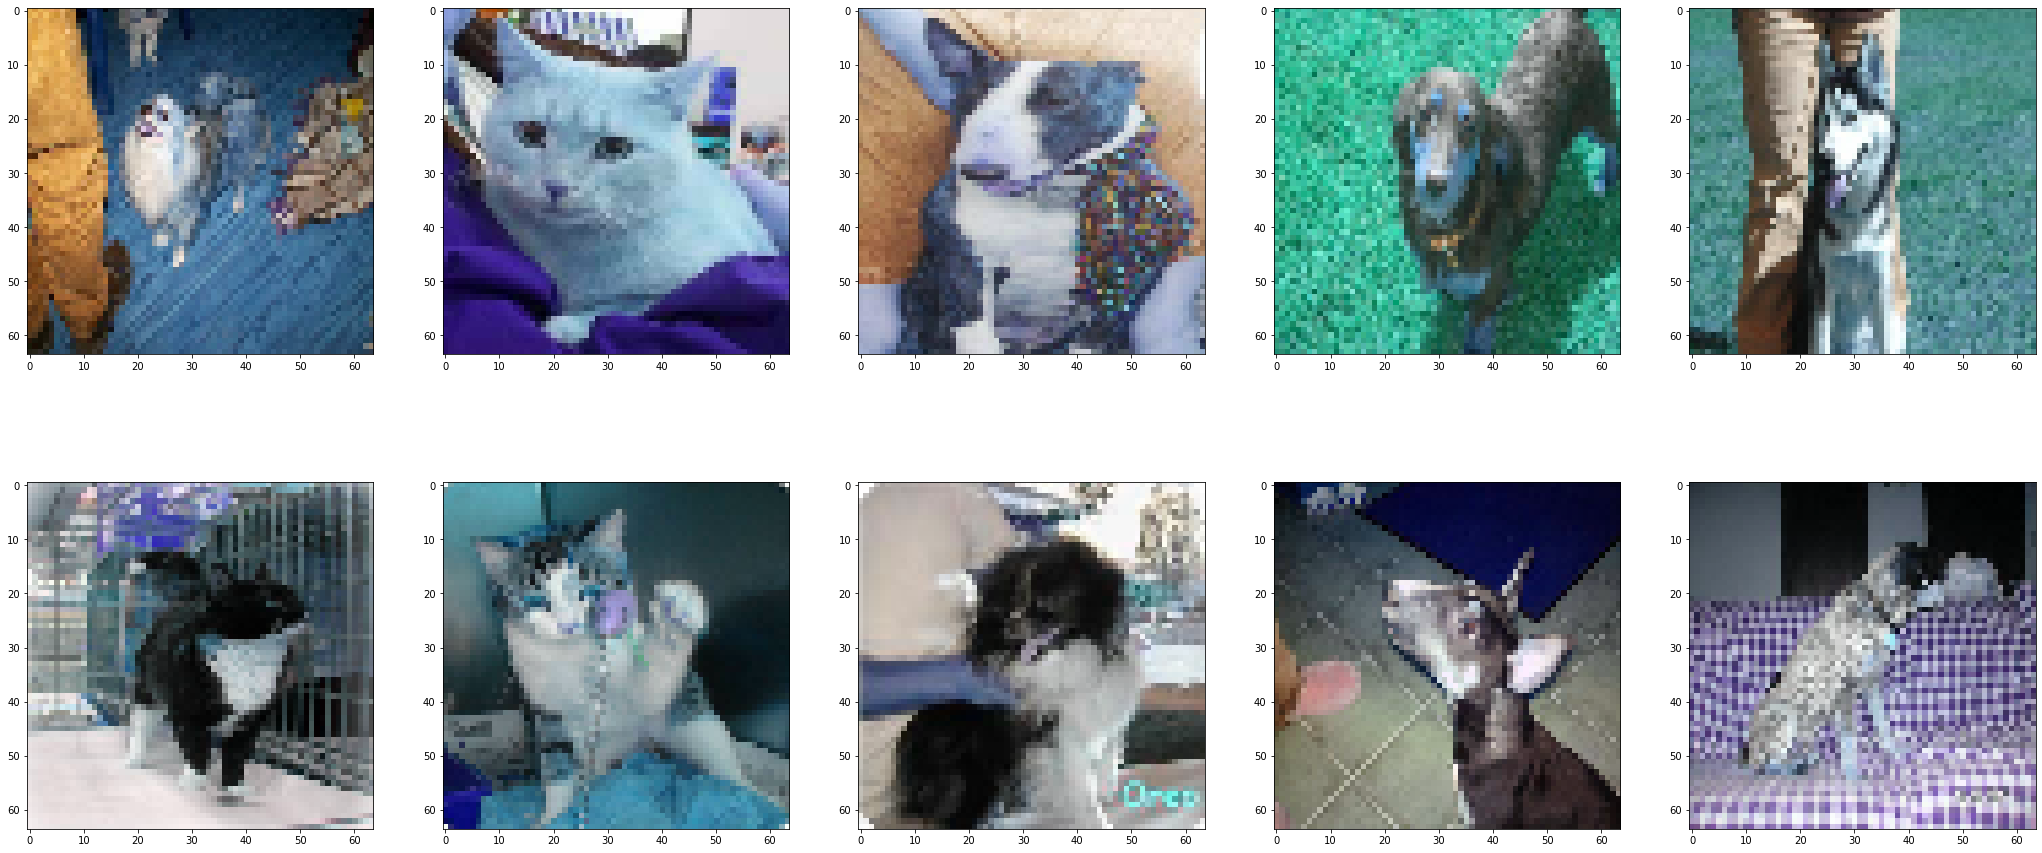

In [34]:
print("TRAIN SET")
show_ten_images(list(X_train[0:10]))

TEST SET
shape[0]-> shape : (64, 64, 3)


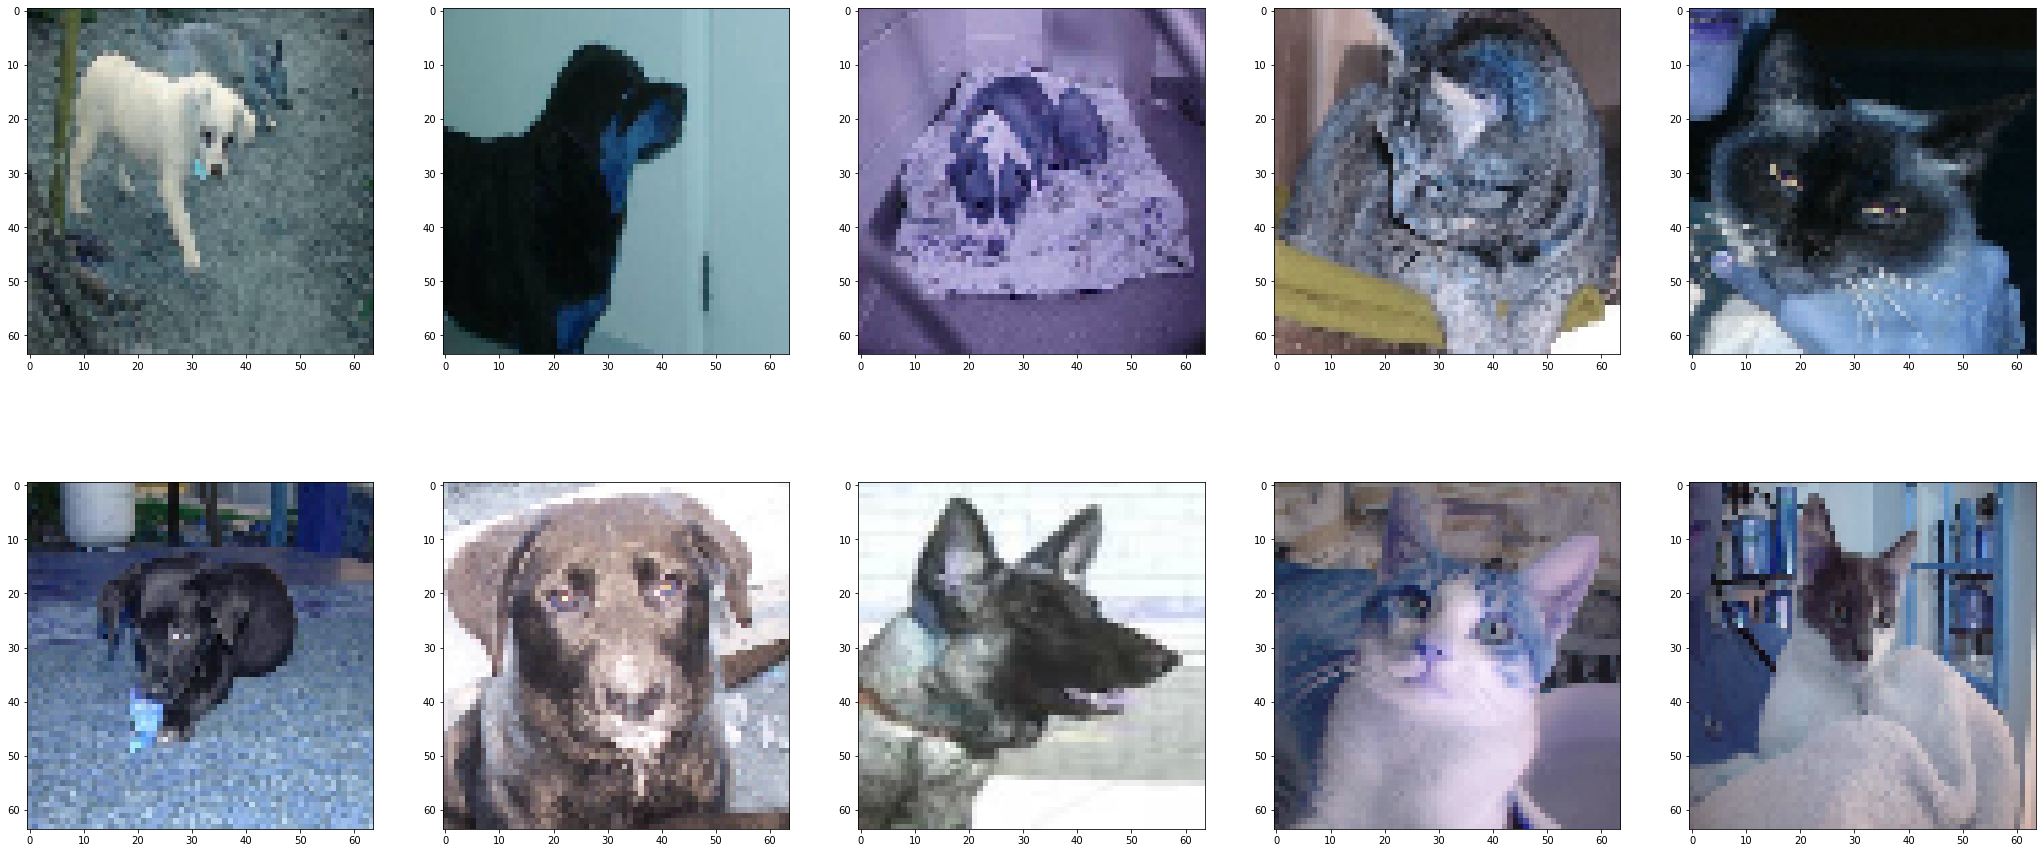

In [35]:
print("TEST SET")
show_ten_images(list(X_test[0:10]))

In [36]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

In [37]:
X_train = X_train / 255
X_test = X_test / 255.
# X.shape = (num_datos_entrenamiento, datos)


In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 300)
(1, 300)
(12288, 20)
(1, 20)


# Arquitectura

El logistic regression puede ser considerado como una red neuronal de una sola capa, con una función de activación en este caso usaremos una función sigmoide, por tanto la arquitectura cumple la siguiente formulación
$${z}^{(i)} = w^{T}x^{(i)}+b$$
$$\hat{y}^{(i)} = sigmoid(z^{(i)})\tag{2}$$

donde la función de perdida es :
$$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})\tag{3}$$

Resultando en la función de costo:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})\tag{6}$$

## Helpers

### Inicialización de pesos

In [39]:
def initiliaze_weight_matrix_and_bias(dim):
    w = np.zeros((dim,1))
    b = 0

    return w,b

### Función de activación no lineal

In [40]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [41]:
print("sigmoid(0)=%f"%(sigmoid(0)))
print("sigmoid(9.2)=%f"%(sigmoid(9.2)))
print("sigmoid([0,2]])=%s"%(str(sigmoid(np.array([0,2])))))

sigmoid(0)=0.500000
sigmoid(9.2)=0.999899
sigmoid([0,2]])=[0.5        0.88079708]


## Forward and Back Propagation

In [42]:
def forward_and_back_propagation(w, b, X, Y):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    #función de costo
    cost = (-1 / m) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat))

    dw = (1 / m) * np.dot(X, (Y_hat - Y).T)
    db = (1 / m) * np.sum(Y_hat - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [43]:
def forward_and_back_propagation_L1(w, b, X, Y,alfaL1):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    #función de costo
    cost =( (-1 / m) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)))+ alfaL1*(np.sum(abs(w))/m)

    dw = (1 / m) * np.dot(X, (Y_hat - Y).T)
    db = (1 / m) * np.sum(Y_hat - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [51]:
def forward_and_back_propagation_L2(w, b, X, Y,alfaL2):
    m = X.shape[1]
    Y_hat = sigmoid(np.dot(w.T, X) + b)
    #función de costo
    cost = ((-1 / m) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)))+ alfaL2*(np.sum(w**2)/(2*m))

    dw = (1 / m) * np.dot(X, (Y_hat - Y).T)
    db = (1 / m) * np.sum(Y_hat - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [54]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
#grads, cost = forward_and_back_propagation(w, b, X, Y)
#grads, cost = forward_and_back_propagation_L1(w, b, X, Y,0.01)
grads, cost = forward_and_back_propagation_L2(w, b, X, Y,0.01)
print('dw = %s'%(grads['dw']))
print('db = %s'%(grads['db']))
print('cost = %s'%(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.809878652727887


## Optimizador

In [62]:
def optimize(w, b, X, Y, num_iter, learning_rate):
    costs = []
    for i in range(num_iter):
        #grads, cost = forward_and_back_propagation(w, b, X, Y)
        #grads, cost = forward_and_back_propagation_L1(w, b, X, Y,0.01)
        grads, cost = forward_and_back_propagation_L2(w, b, X, Y,0.01)

        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print('Cost after iteration %d %f'%(i, cost))
            
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [ ]:
def optimizeMomentum(w, b, X, Y, num_iter, learning_rate):
    costs = []
    beta=9.9
    for i in range(num_iter):
        #grads, cost = forward_and_back_propagation(w, b, X, Y)
        #grads, cost = forward_and_back_propagation_L1(w, b, X, Y,0.01)
        grads, cost = forward_and_back_propagation(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        #w = w - learning_rate * dw
        
        dv=beta*dw+(1-beta)*dw
        w = w - learning_rate * dv
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print('Cost after iteration %d %f'%(i, cost))
            
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [63]:
params, grads, costs = optimize(w, b, X, Y, num_iter= 100, learning_rate = 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0 0.807846
w = [[-0.08608643]
 [ 0.10971233]]
b = -0.1442742664803268
dw = [[0.12311093]
 [0.13629247]]
db = -0.14923915884638042


## Predicción

Se calcula el valor 
$$\hat{y}^{(i)} = sigmoid(z^{(i)})\tag{2}$$
considerando:


*   $\hat{y} <= 0.5$ se convierte a cero, y se considera que es un gato
*   $\hat{y} > 0.5$ se convierte a cero, y se considera que es un perro

In [64]:
def predict(w, b, X):
    m = X.shape[1]
    Y_predic = np.zeros(shape=(1,m))
    w = w.reshape(X.shape[0], 1)

    Y_hat = sigmoid(np.dot(w.T, X) + b)

    print(Y_hat.shape)
    for i in range(m):
        if Y_hat[0,i] > 0.5:
            Y_predic[0, i] = 1
        else:
            Y_predic[0, i] = 0
    return Y_predic

In [65]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("predictions = " + str(predict(w, b, X)))

(1, 3)
predictions = [[1. 1. 0.]]


## Construyendo el modelo

In [66]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w, b = initiliaze_weight_matrix_and_bias(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, 
                                        b, 
                                        X_train, 
                                        Y_train, 
                                        num_iterations, 
                                        learning_rate)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)  

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
      "Y_prediction_test": Y_prediction_test, 
      "Y_prediction_train" : Y_prediction_train, 
      "w" : w, 
      "b" : b,
      "learning_rate" : learning_rate,
      "num_iterations": num_iterations}

    return d

In [67]:
d = model(X_train, 
          Y_train, 
          X_test, 
          Y_test, 
          num_iterations = 1001, 
          learning_rate = 0.005)

Cost after iteration 0 0.693147
Cost after iteration 100 1.085606
Cost after iteration 200 0.849739
Cost after iteration 300 0.699318
Cost after iteration 400 0.583084
Cost after iteration 500 0.486159
Cost after iteration 600 0.404097
Cost after iteration 700 0.334873
Cost after iteration 800 0.281207
Cost after iteration 900 0.255892
Cost after iteration 1000 0.242254
(1, 300)
(1, 20)
train accuracy: 96.66666666666667 %
test accuracy: 65.0 %
